<a href="https://colab.research.google.com/github/Shivamthakur7500/Bharatintern_projects/blob/main/cats_vs_dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 98% 1.04G/1.06G [00:04<00:00, 265MB/s]
100% 1.06G/1.06G [00:04<00:00, 255MB/s]


In [ ]:
import zipfile
zip_ref=zipfile.ZipFile('/content/dogs-vs-cats.zip')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout


In [ ]:
train_ds=keras.utils.image_dataset_from_directory(
    directory="/content/train",
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256),
)
valid_ds=keras.utils.image_dataset_from_directory(
    directory="/content/test",
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256),
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
#normalization
def process(image,labels):
  image=tf.cast(image/255., tf.float32)
  return image,labels
train_ds= train_ds.map(process)
valid_ds = valid_ds.map(process)

In [ ]:
#create cnn model
model=Sequential()
model.add(Conv2D(32 ,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64 ,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128 ,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:

history=model.fit(train_ds,epochs=10,validation_data=valid_ds)

Epoch 1/10
625/625 [==============================] - 69s 105ms/step - loss: 1.1574 - accuracy: 0.5884 - val_loss: 2.0191 - val_accuracy: 0.5742
Epoch 2/10
625/625 [==============================] - 66s 105ms/step - loss: 0.5706 - accuracy: 0.7056 - val_loss: 1.4079 - val_accuracy: 0.5338
Epoch 3/10
625/625 [==============================] - 63s 99ms/step - loss: 0.5382 - accuracy: 0.7346 - val_loss: 0.4784 - val_accuracy: 0.7754
Epoch 4/10
625/625 [==============================] - 66s 105ms/step - loss: 0.4403 - accuracy: 0.7960 - val_loss: 0.4832 - val_accuracy: 0.7716
Epoch 5/10
625/625 [==============================] - 63s 99ms/step - loss: 0.3875 - accuracy: 0.8256 - val_loss: 0.4033 - val_accuracy: 0.8170
Epoch 6/10
625/625 [==============================] - 66s 105ms/step - loss: 0.3190 - accuracy: 0.8605 - val_loss: 0.5135 - val_accuracy: 0.7756
Epoch 7/10
625/625 [==============================] - 64s 102ms/step - loss: 0.2482 - accuracy: 0.8957 - val_loss: 0.5468 - val_accu

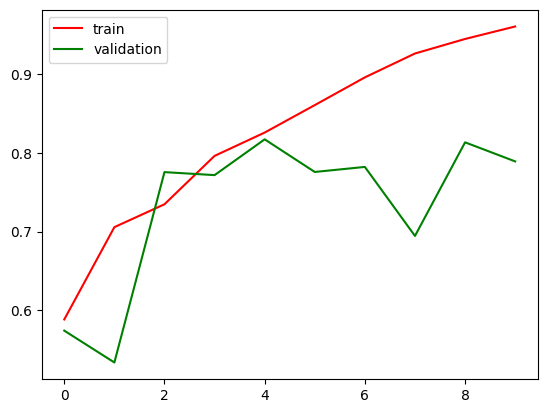

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='green',label='validation')
plt.legend()
plt.show()

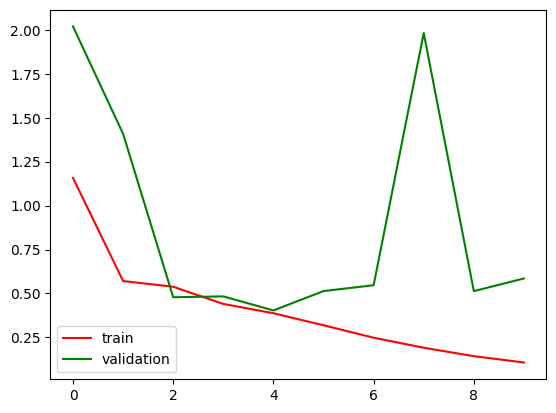

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='green',label='validation')
plt.legend()
plt.show()

In [ ]:
import cv2

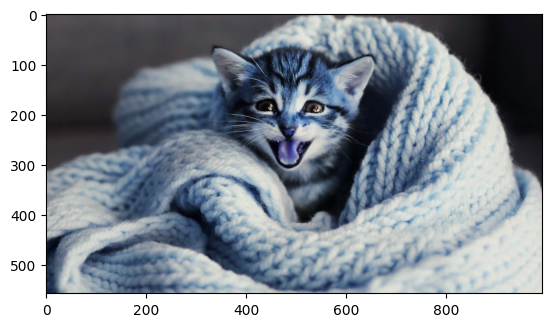

In [ ]:
test_img=cv2.imread('/content/cat.jpg')
plt.imshow(test_img)

In [ ]:
test_img.shape

(558, 992, 3)

In [ ]:
test_img=cv2.resize(test_img,(256,256))
input=test_img.reshape((1,256,256,3))

In [ ]:
#if array =[0.] == cat
#else it is a dog
model.predict(input)

1/1 [==============================] - 0s 460ms/step


array([[0.]], dtype=float32)

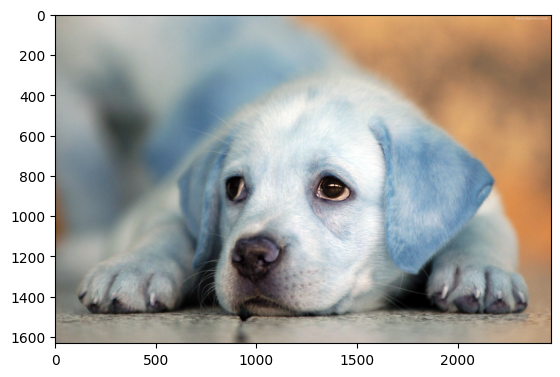

In [ ]:
test_img=cv2.imread('/content/dog.jpg')
plt.imshow(test_img)

In [ ]:
test_img=cv2.resize(test_img,(256,256))
input=test_img.reshape((1,256,256,3))

In [ ]:
#if array =[0.] == cat
#else it is a dog
model.predict(input)

1/1 [==============================] - 0s 31ms/step


array([[1.]], dtype=float32)

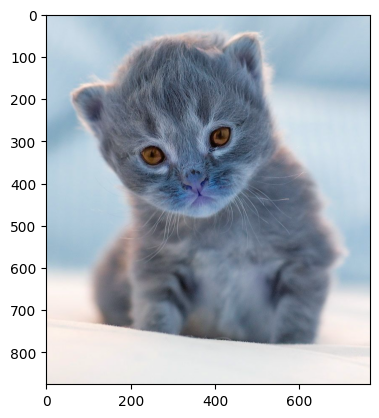

In [ ]:
test_img=cv2.imread('/content/cat1.jpg')
plt.imshow(test_img)

In [ ]:
test_img.shape

(876, 767, 3)

In [ ]:
test_img=cv2.resize(test_img,(256,256))
input=test_img.reshape((1,256,256,3))

In [ ]:
model.predict(input)

1/1 [==============================] - 0s 34ms/step


array([[1.]], dtype=float32)

In [ ]:
#array([[1.]], dtype=float32) => SYMBOLIZES THAT IT IS A CAT PICTURE
